### <span style="color:blue">_**Requirments**_</span>
- <span style="color:blue">_**Session Frequency**_</span>  
- <span style="color:blue">_**Duration of the Session**_</span>  
- <span style="color:blue">_**Total Traffic of the Session**_</span>  
  - <span style="color:blue">_**Download (bytes)**_</span>  
  - <span style="color:blue">_**Upload (bytes)**_</span>


In [1]:
import os, sys
current_dir = os.getcwd()
print(current_dir)

parent_dir = os.path.dirname(current_dir)
print(parent_dir)

sys.path.insert(0,parent_dir)

c:\Users\ibsan\Desktop\TenX\week-2\notebooks
c:\Users\ibsan\Desktop\TenX\week-2


In [2]:
from scripts.UserEngagmentAnalyzer import UserEngagementAnalyzer
from scripts.DataPipline import DataPipeline

In [3]:
# Loads the data from sql
query = "SELECT * FROM xdr_data;"
telecom_df = DataPipeline.load_data_using_sqlalchemy(query=query)
# Cleans the data
Telecom_Cleaned_Data = DataPipeline.Data_Cleaning(telecom_df)
Telecom_Cleaned_Data.head(3)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,2019-04-04 12:01:00,770.0,2019-04-25 14:35:00,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,2019-04-09 13:04:00,235.0,2019-04-25 08:15:00,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,2019-04-09 17:42:00,1.0,2019-04-25 11:58:00,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0


In [4]:
# Initializing the User Engagment Class 
Analyzer = UserEngagementAnalyzer(Telecom_Cleaned_Data)

### <span style="color:blue">_**Calculating User Engagment Metrics**_</span>

In [5]:
Analyzer = UserEngagementAnalyzer(Telecom_Cleaned_Data)
Analyzer.calculate_engagement_metrics()
Analyzer.aggregate_user_data()

- <span style="color:blue">_**Top 10 Customers per Metric**_</span> 

In [6]:
Analyzer.find_top_customers() 


Top 10 Customers per Metric:
Top 10 by Session Frequency:        MSISDN/Number  Session_Frequency  Total_Session_Duration  Total_Traffic
13451   3.362632e+10                 18               8791927.0   7.971167e+09
6394    3.361489e+10                 17               9966898.0   8.846226e+09
13107   3.362578e+10                 17              18553754.0   8.499621e+09
36867   3.365973e+10                 16               4035428.0   7.705863e+09
75999   3.367588e+10                 15               4865947.0   7.891111e+09
92486   3.376054e+10                 15               9279434.0   8.514774e+09
64825   3.366716e+10                 13               8744914.0   5.618394e+09
656     3.360313e+10                 12               6287761.0   4.976195e+09
1267    3.360452e+10                 12               5207990.0   5.487855e+09
13918   3.362708e+10                 12               4703516.0   5.754731e+09
Top 10 by Total Session Duration:        MSISDN/Number  Session_Frequenc

- <span style="color:blue">_**Cluster Analysis**_</span> 

In [7]:
Analyzer.cluster_users()
Analyzer.analyze_clusters()


Cluster Statistics:
        Session_Frequency                      Total_Session_Duration  \
                      min max      mean    sum                    min   
Cluster                                                                 
0                       1   4  2.153534  50397                18235.0   
1                       1   2  1.022877  81063                 7142.0   
2                       1  18  4.170270  15430                66594.0   

                                                 Total_Traffic                \
                max           mean           sum           min           max   
Cluster                                                                        
0         1480875.0  213714.110247  5.001338e+09   161379366.0  2.511847e+09   
1         1035261.0  103581.149615  8.208806e+09    33249009.0  1.349446e+09   
2        18553754.0  644697.405135  2.385380e+09   370420998.0  8.846226e+09   

                                     
                 mean

- <span style="color:blue">_**Visualizing Clusters**_</span>

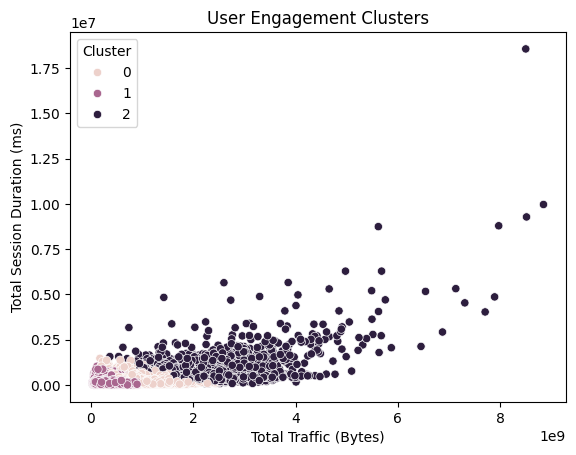

In [8]:

Analyzer.visualize_clusters()

- <span style="color:blue">_**Finding Optimal Clusters**_</span>

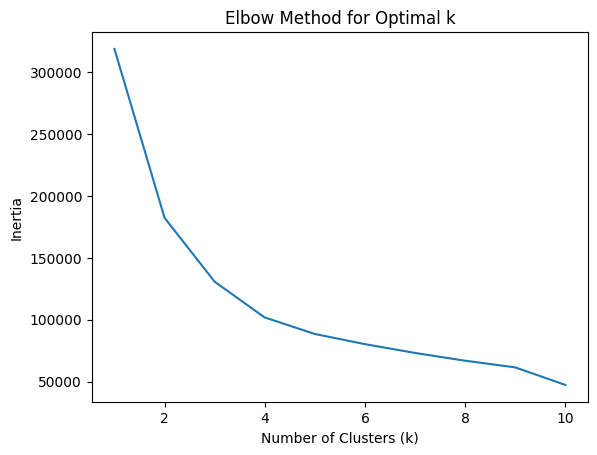

In [9]:
Analyzer.find_optimal_k()